<h1 style="color: rgb(0, 100, 150);font-size: 2rem;font-family: 'system-ui';font-weight: bold; ">TP 2: Logistic Regression:</h1>

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem;font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Importing Python libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Retrieving data in the form of the dataFrame</h1>

In [2]:
df=pd.read_csv("ex2data1.txt")

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">First 5 rows of the dataFrame</h1>

In [3]:
df.head()

,Exam1,Exam2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Last 5 rows of the dataFrame</h1>

In [4]:
df.tail()

,Exam1,Exam2,Admission
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Shape of the dataFrame</h1>

In [5]:
df.shape

(100, 3)

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Number of Null Values in each feature</h1>

In [6]:
df.isna().sum()

Exam1        0
Exam2        0
Admission    0
dtype: int64

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Drop Duplicates rows</h1>

In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(100, 3)

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Value counts of Admission</h1>

In [9]:
df["Admission"].value_counts()

1    60
0    40
Name: Admission, dtype: int64

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Information about the Dataset</h1>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Exam1      100 non-null    float64
 1   Exam2      100 non-null    float64
 2   Admission  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [11]:
df.describe()

,Exam1,Exam2,Admission
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Data Visualization</h1>

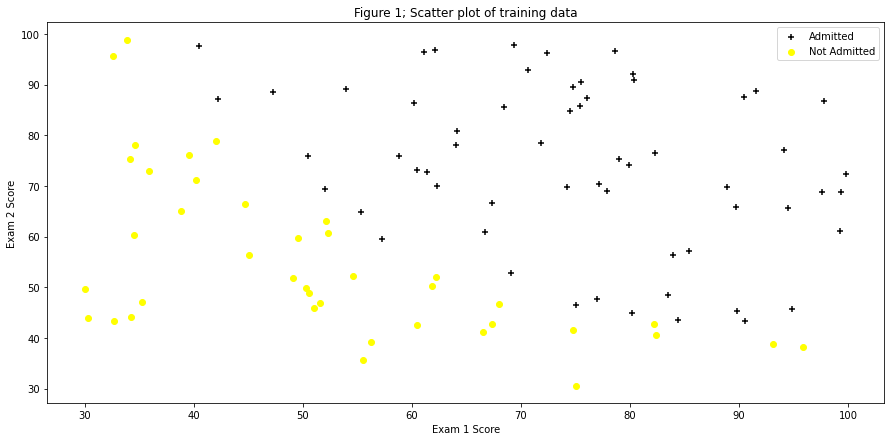

In [12]:
plt.figure(figsize=(15,7))
plt.scatter(df["Exam1"][df["Admission"]==1],df["Exam2"][df["Admission"]==1],marker="+",c="black")
plt.scatter(df["Exam1"][df["Admission"]==0],df["Exam2"][df["Admission"]==0],marker="o",c="yellow")
plt.legend(["Admitted","Not Admitted"])
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Figure 1; Scatter plot of training data")
plt.show()

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Data Normalization</h1>

In [13]:
moyenne1=df["Exam1"].mean()
moyenne2=df["Exam2"].mean()
ecartType1=df["Exam1"].std()
ecartType2=df["Exam2"].std()

In [14]:
df["Exam1"]=(df["Exam1"]-df["Exam1"].mean())/df["Exam1"].std()
df["Exam2"]=(df["Exam2"]-df["Exam2"].mean())/df["Exam2"].std()

In [15]:
df.head()

,Exam1,Exam2,Admission
0,-1.594216,0.635141,0
1,-1.817101,-1.201489,0
2,-1.531325,0.359483,0
3,-0.280687,1.080923,1
4,0.688062,0.490905,1


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Split the columns to features (X) and target (y)</h1>

In [16]:
X=df.drop("Admission",axis=1).to_numpy()
y=df["Admission"].to_numpy()

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Function that calculat z=wx+b</h1>

In [17]:
def calculZ(w,b,X):
    return np.dot(w,X.T)+b

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Sigmoid Function</h1>

In [18]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Sigmoid Function</h1>

In [19]:
def costFunction(y,yhat,x):
    m=x.shape[0]
    J=np.sum(-y*np.log(yhat)-(1-y)*np.log(1-yhat))
#     J=np.sum(k)
    return (J/m)

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Function that Calculate the Derivative of the Cost Function</h1>

In [20]:
def calculDerive(yhat,y,x):
    m=x.shape[0]
    db=np.sum(yhat-y)/m
    dw=(np.dot(yhat-y,x)/m)
    return dw,db

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Gradient Descent Function</h1>

In [21]:
def gradientDescent(w,b,x,y,learningRate,nbrIterations):
    a=[]
    allW=[]
    for i in range(nbrIterations):
        z=calculZ(w,b,x)
        yhat=sigmoid(z)
        dw,db=calculDerive(yhat,y,x)
        w=w-learningRate*dw
        b=b-learningRate*db
        a.append(costFunction(y,yhat,x))
        allW.append(w)
    z=calculZ(w,b,x)
    yhat=sigmoid(z)
    J=costFunction(y,yhat,x)
    return J,w,b,a,allW

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">The Results</h1>

In [22]:
m,n=X.shape
w=np.zeros((n,))
b=0
learningRate=0.01
nbrIterations=30000
J,w,b,a,allW=gradientDescent(w,b,X,y,learningRate,nbrIterations)

In [23]:
print("Cost Function J:",J,"\nw:",w,"\nb:",b)

Cost Function J: 0.2038793989123699 
w: [3.77101221 3.50989047] 
b: 1.6055245327237577


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Plotting the Results for each iteration</h1>

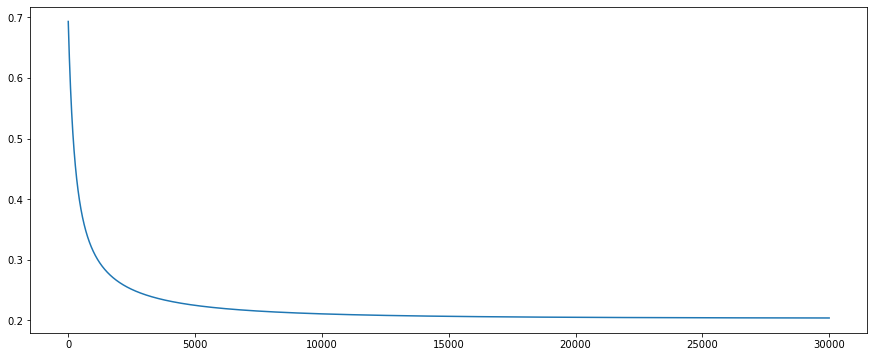

In [24]:
plt.figure(figsize=(15,6))
plt.plot([i for i in range(nbrIterations)],a)
plt.show()

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Function for predicting</h1>

In [26]:
def prediction(w,b,X,threshold):
    z=calculZ(w,b,X)
    yhat=sigmoid(z)
    pred=(yhat>=threshold).astype(int)
    return pred

In [27]:
x1=np.array([-2,2])
x2=-(w[0]*x1)/w[1]-(b/w[1])

In [28]:
x2

array([ 1.69136329, -2.60622063])

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Plotting The Decision Boundary</h1>

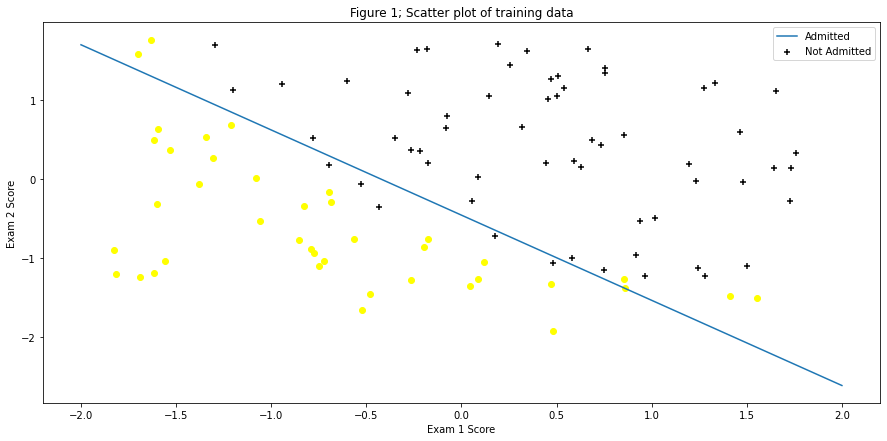

In [29]:
plt.figure(figsize=(15,7))
plt.scatter(df["Exam1"][df["Admission"]==1],df["Exam2"][df["Admission"]==1],marker="+",c="black")
plt.scatter(df["Exam1"][df["Admission"]==0],df["Exam2"][df["Admission"]==0],marker="o",c="yellow")
plt.plot(x1,x2)
plt.legend(["Admitted","Not Admitted"])
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Figure 1; Scatter plot of training data")
plt.show()

In [30]:
x0=np.array([45,85])
threshold=0.776

In [31]:
x0[0]=(x0[0]-moyenne1)/ecartType1
x0[1]=(x0[1]-moyenne2)/ecartType2

In [32]:
prediction(w,b,x0,threshold)

1

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Add a new row in the Plot</h1>

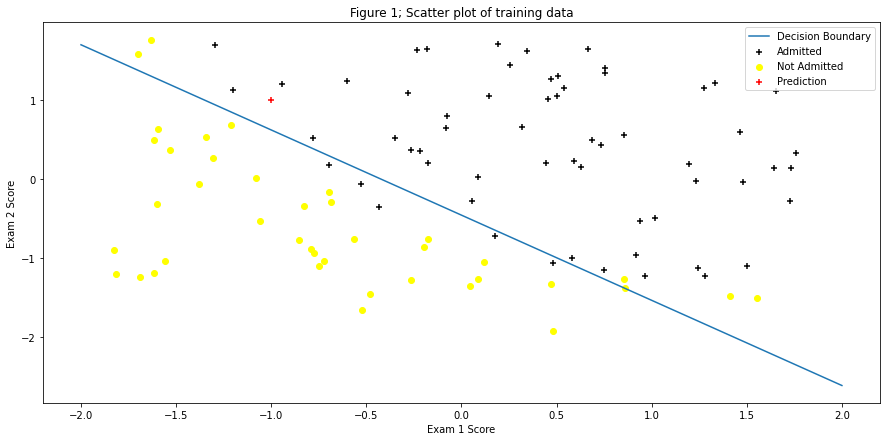

In [33]:
plt.figure(figsize=(15,7))
plt.scatter(df["Exam1"][df["Admission"]==1],df["Exam2"][df["Admission"]==1],marker="+",c="black")
plt.scatter(df["Exam1"][df["Admission"]==0],df["Exam2"][df["Admission"]==0],marker="o",c="yellow")
plt.plot(x1,x2)
if prediction(w,b,x0,threshold):
    plt.scatter(x0[0],x0[1],marker="+",c="red")
else:
    plt.scatter(x0[0],x0[1],marker="o",c="red")
plt.legend(["Decision Boundary","Admitted","Not Admitted","Prediction"])
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Figure 1; Scatter plot of training data")
plt.show()